
<a id='julia-essentials'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Julia Essenciais

## Conteúdo

- [Julia Essenciais](#Julia-Essenciais)  
  - [Resumo](#Resumo)  
  - [Tipos de Dados Comuns](#Tipos-de-Dados-Comuns)  
  - [Iterando](#Iterando)  
  - [Comparações e Operadores Lógicos](#Comparações-e-Operadores-Lógicos)  
  - [Funções Definidas pelo Usuário](#Funções-Definidas-pelo-Usuário)  
  - [Transmissão](#Transmissão)  
  - [Escopos e Encerramentos](#Escopos-e-Encerramentos)  
  - [Exercícios](#Exercícios)  
  - [Soluções](#Soluções)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://quantecon.org/) pelos bolsistas CNPq, Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob supervisão do Prof. Christiano Penna, do CAEN/UFC.*

Tendo abordado alguns exemplos, passemos agora a uma exposição mais sistemática dos recursos essenciais da linguagem.



## Resumo

Tópicos:

- Tipos de dados comuns  
- Interação
- Mais sobre funções definidas pelo usuário  
- Comparações e lógica 

### Configuração

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0", instantiate = true) # uncomment to force package installation

In [2]:
using LinearAlgebra, Statistics

## Tipos de Dados Comuns

Como a maioria das linguagens, a linguagem Julia define e fornece funções para operar mem tipos de dados padrão como:

- integers  (inteiros)
- floats  
- strings  
- arrays(matrizes), etc…  


Vamos aprender um pouco mais sobre eles.

### Tipos de Dados Primitivos

Um tipo de dado particulamente simples é o valor Booleano (*Boolean value*), que pode ser `true` ou
`false`

In [3]:
x = true

true

In [4]:
typeof(x)

Bool

In [5]:
y = 1 > 2  # agora y = false

false

Os dois tipos de dados mais comuns usados para representar números são números inteiros e flutuantes. 

(Os computadores distinguem entre números flutuantes e números inteiros porque a aritmética é tratada de maneira diferente).

In [6]:
typeof(1.0)

Float64

In [7]:
typeof(1)

Int64

Se você estiver usando um sistema 32 bits, ainda verá `Float64`, mas você verá `Int32` no lugar de `Int64` (consulte [a seção Tipo de números inteiros](https://docs.julialang.org/en/stable/manual/integers-and-floating-point-numbers/#Integers-1) no manual do Julia).

Operações aritiméticas são bastante padrão.

In [8]:
x = 2; y = 1.0;

O `;` pode ser usado para suprimir a saída a partir de uma linha de código, ou combinar duas linhas de códigos em conjunto (como acima), mas de outro modo não é necessário.

In [9]:
x * y

2.0

In [10]:
x^2

4

In [11]:
y / x

0.5

Embora `*` possa ser omitido entre uma múltiplicação entre um número literal e uma variável

In [12]:
2x - 3y

1.0

Uma ferramenta útil para exibir expressões e códigos é usar o macro `@show`, que exibe o texto e os resultados.

In [13]:
@show 2x - 3y
@show x + y;

2x - 3y = 1.0
x + y = 3.0


Aqui nós usamos `;` para suprimir a saída na última linha, que retorna os resultados de `x + y`

Números complexos são outro tipo de dados primitivos, com a parte imaginária sendo especificada por `im`

In [14]:
x = 1 + 2im

1 + 2im

In [15]:
y = 1 - 2im

1 - 2im

In [16]:
x * y  # multiplicação complexa

5 + 0im

Existem vários tipos de dados mais primitivos que apresentaremos conforme necessário.

### Strings

Um string é um tipo de dados para armazenar uma sequência de caracteres.

Em Julia, os strings são criadas usando aspas duplas (aspas simples são reservadas para o tipo de caractere).

In [17]:
x = "foobar"

"foobar"

In [18]:
typeof(x)

String

Você já viu exemplos das operações formatação simples de string em Julia.

In [19]:
x = 10; y = 20

20

A expressão `\$` dentro de um string é usado para interpolar uma variável.

In [20]:
"x = $x"

"x = 10"

Entre parênteses, você pode dividir os resultados das expressões em strings também.

In [21]:
"x + y = $(x + y)"

"x + y = 30"

Para concatenar strings use `*`.

In [22]:
"foo" * "bar"

"foobar"

Julia fornece muitas funções para trabalhar com *strings*.

In [23]:
s = "Charlie don't surf"

"Charlie don't surf"

In [24]:
split(s)

3-element Array{SubString{String},1}:
 "Charlie"
 "don't"  
 "surf"   

In [25]:
replace(s, "surf" => "ski")

"Charlie don't ski"

In [26]:
split("fee,fi,fo", ",")

3-element Array{SubString{String},1}:
 "fee"
 "fi" 
 "fo" 

In [27]:
strip(" foobar ")  # remove o espaço em branco

"foobar"

Julia também pode encontrar e substituir usando [expressões regulares](https://en.wikipedia.org/wiki/Regular_expression) ([consulte expressões regulares na documentação](https://docs.julialang.org/en/stable/manual/strings/#Regular-Expressions-1) para mais informações).

In [28]:
match(r"(\d+)", "Top 10")  # encontra digitos em um string

RegexMatch("10", 1="10")

### Contêiners

Julia tem vários tipos básicos para armazenar coleções de dados.

Já discutimos matrizes.

Um tipo de dados relacionado é uma  **tuple**, que é imutável e pode conter diferentes tipos.

In [29]:
x = ("foo", "bar")
y = ("foo", 2)

("foo", 2)

In [30]:
typeof(x), typeof(y)

(Tuple{String,String}, Tuple{String,Int64})

Um valor imutável é aquele que não pode ser alterado depois que reside na memória.

Em particular, os *tuples* não suportam a atribuição de itens (ou seja `x[1] = "test"`, falhariam)

Tuples podem ser construidos com ou sem parênteses.

In [31]:
x = "foo", 1

("foo", 1)

In [32]:
function f()
    return "foo", 1
end
f()

("foo", 1)

Tuples também podem ser descompactadas diretamente em variáveis.

In [33]:
x = ("foo", 1)

("foo", 1)

In [34]:
word, val = x
println("word = $word, val = $val")

word = foo, val = 1


Tuples podem ser criados com uma interrupção `,` – isso é usual para criar um tuple com um único elemento.

In [35]:
x = ("foo", 1,)
y = ("foo",)
typeof(x), typeof(y)

(Tuple{String,Int64}, Tuple{String})

#### Referenciando itens 

O último elemento de um tipo de sequência pode ser acessado com a palavra-chave `end`.

In [36]:
x = [10, 20, 30, 40]

4-element Array{Int64,1}:
 10
 20
 30
 40

In [37]:
x[end]

40

In [38]:
x[end-1]

30

Para acessar múltiplos elementos de uma matriz (array) ou tuple, você pode usar a notação de fatiamento.

In [39]:
x[1:3]

3-element Array{Int64,1}:
 10
 20
 30

In [40]:
x[2:end]

3-element Array{Int64,1}:
 20
 30
 40

A mesma notação de fatia funciona em *Strings*.

In [41]:
"foobar"[3:end]

"obar"

#### Dicionários

Outro tipo de contêiner que vale a pena mencionar são os dicionários.

Os dicionários são como matrizes, exceto que os itens são nomeados em vez de numerados.

In [42]:
d = Dict("name" => "Frodo", "age" => 33)

Dict{String,Any} with 2 entries:
  "name" => "Frodo"
  "age"  => 33

In [43]:
d["age"]

33

Os strings `name` e `age` são chamados de **keys** (chaves).

As chaves são mapeadas para valores (neste caso `"Frodo"` e `33`).

Elas podem ser acessadas via `keys(d)` e `values(d)` respectivamentes.

**Nota:** Diferentemente do Python e de outras linguagens dinâmicas, os dicionários raramente são a abordagem correta (ou seja, geralmente chamada de "estrutura de dados do diabo").

A flexibilidade (ou seja, pode armazenar qualquer coisa e usar qualquer coisa como chave) frequentemente custa o custo do desempenho, se for mal utilizada.

Geralmente, é melhor ter coleções de parâmetros e resultados em uma tupla nomeada, que fornece ao compilador mais oportunidades para otimizar o desempenho e também torna o código mais seguro.



<a id='iterating-version-1'></a>

## Iterando

Uma das tarefas mais importantes da computação é percorrer uma sequência de dados e executar uma determinada ação.

Julia fornece ferramentas simples e flexíveis para iteração, como discutimos agora.

### Iteráveis

Um iterável é algo que você pode colocar no lado direito de `for` e fazer um loop.

Isso inclui tipos de dados de sequência, como matrizes.

In [44]:
actions = ["surf", "ski"]
for action in actions
    println("Charlie doesn't $action")
end

Charlie doesn't surf
Charlie doesn't ski


Eles também incluem os chamados **iteradores**.

Você já se deparou com esses tipos de valores.

In [45]:
for i in 1:3
    print(i)
end

123

Se você pedir as chaves (**keys**) do dicionário, obtém um iterador.

In [46]:
d = Dict("name" => "Frodo", "age" => 33)

Dict{String,Any} with 2 entries:
  "name" => "Frodo"
  "age"  => 33

In [47]:
keys(d)

Base.KeySet for a Dict{String,Any} with 2 entries. Keys:
  "name"
  "age"

Isso faz sentido, já que a coisa mais comum que você quer fazer com as chaves é fazer um loop sobre elas.

O benefício de fornecer um iterador em vez de uma matriz, por exemplo, é que o primeiro é mais eficiente em termos de memória.

Se você precisar transformar um iterador em uma matriz, sempre poderá usar `collect()`.

In [48]:
collect(keys(d))

2-element Array{String,1}:
 "name"
 "age" 

### Loop sem Índices

Você pode fazer um loop sobre sequências sem indexação explícita, o que geralmente leva a um código mais puro.

Por exemplo, compare:

In [49]:
x_values = 1:5

1:5

In [50]:
for x in x_values
    println(x * x)
end

1
4
9
16
25


In [51]:
for i in eachindex(x_values)
    println(x_values[i] * x_values[i])
end

1
4
9
16
25


Julia fornece algumas funções auxiliares de estilo funcional (semelhantes ao Python e R) para facilitar o loop sem índices.

Um é `zip()`, que é usado para percorrer pares de duas sequências.

Por exemplo, tente executar o seguinte código.

In [52]:
countries = ("Japan", "Korea", "China")
cities = ("Tokyo", "Seoul", "Beijing")
for (country, city) in zip(countries, cities)
    println("The capital of $country is $city")
end

The capital of Japan is Tokyo
The capital of Korea is Seoul
The capital of China is Beijing


Se precisarmos do índice e do valor, uma opção é usar `enumerate()`.

O snippet a seguir fornecerá a ideia.

In [53]:
countries = ("Japan", "Korea", "China")
cities = ("Tokyo", "Seoul", "Beijing")
for (i, country) in enumerate(countries)
    city = cities[i]
    println("The capital of $country is $city")
end

The capital of Japan is Tokyo
The capital of Korea is Seoul
The capital of China is Beijing


### Compreensões

([Veja a documentação de compreensões](https://docs.julialang.org/en/v1/manual/arrays/#Comprehensions-1))

As compreensões são uma ferramenta elegante para criar novas matrizes, dicionários etc. a partir de iteráveis.

Aqui estão alguns exemplos:

In [54]:
doubles = [ 2i for i in 1:4 ]

4-element Array{Int64,1}:
 2
 4
 6
 8

In [55]:
animals = ["dog", "cat", "bird"];   # o ponto e vírgula suprime o resultado

In [56]:
plurals = [ animal * "s" for animal in animals ]

3-element Array{String,1}:
 "dogs" 
 "cats" 
 "birds"

In [57]:
[ i + j for i in 1:3, j in 4:6 ]

3×3 Array{Int64,2}:
 5  6  7
 6  7  8
 7  8  9

In [58]:
[ i + j + k for i in 1:3, j in 4:6, k in 7:9 ]

3×3×3 Array{Int64,3}:
[:, :, 1] =
 12  13  14
 13  14  15
 14  15  16

[:, :, 2] =
 13  14  15
 14  15  16
 15  16  17

[:, :, 3] =
 14  15  16
 15  16  17
 16  17  18

Compreensões também podem criar matrizes de tuples ou tuplas nomeadas.

In [59]:
[ (i, j) for i in 1:2, j in animals]

2×3 Array{Tuple{Int64,String},2}:
 (1, "dog")  (1, "cat")  (1, "bird")
 (2, "dog")  (2, "cat")  (2, "bird")

In [60]:
[ (num = i, animal = j) for i in 1:2, j in animals]

2×3 Array{NamedTuple{(:num, :animal),Tuple{Int64,String}},2}:
 (num = 1, animal = "dog")  …  (num = 1, animal = "bird")
 (num = 2, animal = "dog")     (num = 2, animal = "bird")

## Comparações e Operadores Lógicos

### Comparações

Como vimos anteriormente, ao testar a igualdade, usamos `==`

In [61]:
x = 1

1

In [62]:
x == 2

false

para "não igual" use  `!=` or `≠` (`\ne<TAB>`)

In [63]:
x != 3

true

Julia também pode testar a igualdade aproximada com `≈` (`\approx<TAB>`)

In [64]:
1 + 1E-8 ≈ 1

true

Entretanto, tenha cuidado ao usar isso, pois existem sutilezas envolvendo as escalas das quantidades comparadas.

### Combinando Expressões

Aqui estão os conectivos lógicos padrão (conjunção, disjunção).

In [65]:
true && false

false

In [66]:
true || false

true

Lembre

- `P && Q` é `verdadeiro` se ambos forem `verdadeiros`, caso contrário é `falso` 
- `P || Q` é `falso` se ambos forem `falsos`, caso contrário é `verdadeiro`  

## Funções Definidas pelo Usuário

Vamos falar um pouco mais sobre funções definidas pelo usuário.

As funções definidas pelo usuário são importantes para melhorar a clareza do seu código.

- separando diferentes vertentes da lógica.
- facilitar a reutilização de código (escrever a mesma coisa duas vezes é sempre uma má ideia).

As funções de Julia são convenientes:

- Qualquer número de funções pode ser definido em um determinado arquivo.
- Qualquer "valor" pode ser passado para uma função como argumento, incluindo outras funções.
- As funções podem ser (e geralmente são) definidas dentro de outras funções.
- Uma função pode retornar qualquer tipo de valor, incluindo funções.

Veremos muitos exemplos dessas estruturas nas seguintes aulas.

Por enquanto, vamos abordar algumas das diferentes maneiras de definir funções.

### Afirmação de retorno

Em Julia, o  `return` é uma afirmação opicional, para que as seguintes funções tenham comportamento idêntico.

In [67]:
function f1(a, b)
    return a * b
end

function f2(a, b)
    a * b
end

f2 (generic function with 1 method)

Quando nenhuma afirmação de retorno está presente, o último valor obtido ao executar o bloco de código é retornado.

Embora alguns prefiram a segunda opção, geralmente favorecemos a primeira, com base em que explícito é melhor do que implícito.

Uma função pode ter arbitrariamente muitas instruções de `return`, com a execução terminando quando o primeiro retorno é atingido.

Você pode ver isso em ação ao experimentar a seguinte função.

In [68]:
function foo(x)
    if x > 0
        return "positive"
    end
    return "nonpositive"
end

foo (generic function with 1 method)

### Outra sintaxe para definir funções

Para definições curtas de funções, Julia oferece uma sintaxe simplificada atraente.

Primeiro, quando o corpo da função é uma expressão simples, ele pode ser definido sem a palavra  `function` ou `end`.

In [69]:
f(x) = sin(1 / x)

f (generic function with 2 methods)

Vamos verificar se funciona.

In [70]:
f(1 / pi)

1.2246467991473532e-16

Julia também permite definir funções anônimas.

Por exemplo, para definir `f(x) = sin(1 / x)` você pode usar `x -> sin(1 / x)`.

A diferença é que a segunda função não tem um nome associado a ela.

Como você pode usar uma função sem nome?

Normalmente é como argumento para outra função.

In [71]:
map(x -> sin(1 / x), randn(3))  # aplica a função para cada elemento

3-element Array{Float64,1}:
 -0.9441041270178885
 -0.8601929443020222
  0.4988024948415746

### Argumentos opcionais e palavra-chave

([Veja a documentação dos argumentos das palavras chaves](https://docs.julialang.org/en/v1/manual/functions/#Keyword-Arguments-1))

Os argumentos da função podem receber valores padrão.

In [72]:
f(x, a = 1) = exp(cos(a * x))

f (generic function with 3 methods)

Se o argumento não for fornecido, o valor padrão será substituído.

In [73]:
f(pi)

0.36787944117144233

In [74]:
f(pi, 2)

2.718281828459045

Outra opção é usar os argumentos das **palavras-chaves**.

A diferença entre a palavra-chave e os argumentos padrão (posicionais) é que eles são analisados e delimitados pelo nome, e não pela ordem na chamada da função.

Por exemplo, na chamada.

In [75]:
f(x; a = 1) = exp(cos(a * x))  # observe o ; na definição

f(pi, a = 2) # chamando com ; geralmente é opcional e geralmente desencorajado

2.718281828459045

## Transmissão

([Veja a documentação de transmissão](https://docs.julialang.org/en/v1/manual/arrays/#Broadcasting-1))

Um cenário comum na computação é que:

- temos uma função `f` que `f(x)` retorna um número para qualquer número `x`.
- queremos aplicar `f` a todos os elementos de um iterável `x_vec` para produzir um novo resultado `y_vec`.

Na linguaguem Julia, os loops são rápidos e podemos fazer isso facilmente com um loop.

Por exemplo, suponha que queremos aplicar `sin` a `x_vec = [2.0, 4.0, 6.0, 8.0]`.

O código a seguir fará o trabalho.

In [76]:
x_vec = [2.0, 4.0, 6.0, 8.0]
y_vec = similar(x_vec)
for (i, x) in enumerate(x_vec)
    y_vec[i] = sin(x)
end

Mas isso é um pouco pesado, então o Julia oferece a sintaxe alternativa.

In [77]:
y_vec = sin.(x_vec)

4-element Array{Float64,1}:
  0.9092974268256817 
 -0.7568024953079282 
 -0.27941549819892586
  0.9893582466233818 

Em geral, se `f` é alguma função em Julia, entao, `f.` faz referência à versão transmitida.

Convenientemente, isso se aplica também a funções definidas pelo usuário.

Para ilustrar, vamos escrever uma função `chisq` que `chisq(k)` retorne uma variável aleatória qui-quadrado com `k`graus de liberdade quando `k` for um número inteiro.

Ao fazer isso, exploraremos o fato de que, se tomarmos `k` padrões normais independentes, agruparmos todos e somarmos, obteremos um qui-quadrado com `k` graus de liberdade.

In [78]:
function chisq(k)
    @assert k > 0
    z = randn(k)
    return sum(z -> z^2, z)  # mesmo como `sum(x^2 para x em z)`
end

chisq (generic function with 1 method)

O macro `@assert`verificará se a próxima expressão será avaliada `true`, e parará e exibirá um erro caso contrário.

In [79]:
chisq(3)

0.6573517465556603

Observe que chamadas com números inteiros menores que 1 acionarão uma falha de asserção dentro do corpo da função.

In [80]:
chisq(-2)

AssertionError: AssertionError: k > 0

Vamos tentar isso em uma matriz de números inteiros, adicionando a transmissão(*broadcast*).

In [81]:
chisq.([2, 4, 6])

3-element Array{Float64,1}:
 0.9498523353530517
 4.278587425125151 
 2.93289190804361  

A notação de transmissão não é simplesmente vetorização, pois é capaz de "fundir" várias transmissões para gerar código eficiente.

In [82]:
x = 1.0:1.0:5.0
y = [2.0, 4.0, 5.0, 6.0, 8.0]
z = similar(y)
z .= x .+ y .- sin.(x) # gera código eficiente em vez de muitos temporários

5-element Array{Float64,1}:
  2.1585290151921033
  5.090702573174318 
  7.858879991940133 
 10.756802495307928 
 13.958924274663138 

Um macro de conveniência para adicionar transmissão a cada chamada de função é `@.`

In [83]:
@. z = x + y - sin(x)

5-element Array{Float64,1}:
  2.1585290151921033
  5.090702573174318 
  7.858879991940133 
 10.756802495307928 
 13.958924274663138 

Como os `+, -, =` operadores são funções, nos bastidores isso é transmitido contra os vetores `x`e `y`.

O compilador corrigirá qualquer coisa que seja escalar e iterará em todos os vetores.

In [84]:
f(a, b) = a + b # função bivariada 
a = [1 2 3]
b = [4 5 6]
@show f.(a, b) # em ambos
@show f.(a, 2); # corrigir escalar para o segundo

f.(a, b) = [5 7 9]
f.(a, 2) = [3 4 5]


O compilador só pode detectar valores "escalares" dessa maneira para um número limitado de tipos (por exemplo, números inteiros, pontos flutuantes etc.) e alguns pacotes (por exemplo, Distribuições).

Para outros tipos, você precisará agrupar os escalares `Ref` para corrigi-los, ou ele tentará transmitir o valor.

Outro lugar em que você pode usar o `Ref`, é para corrigir um parâmetro de função que você não deseja transmitir.

In [85]:
f(x, y) = [1, 2, 3] ⋅ x + y   # "⋅" pode ser digitado por \cdot<tab>
f([3, 4, 5], 2)   # usa o vetor como primeiro parâmetro
f.(Ref([3, 4, 5]), [2, 3])   # transmitindo pelo segundo parâmetro, corrigindo primeiro

2-element Array{Int64,1}:
 28
 29

## Escopos e Encerramentos

Como as variáveis globais geralmente são uma má idéia, nos concentraremos na compreensão do papel das boas práticas de escopo local.

Dito isto, embora muitas das variáveis neste bloco de anotações Jupyter sejam globais, tomamos o cuidado de escrever o código para que todo o código possa ser copiado dentro de uma função.

Quando copiadas dentro de uma função, variáveis se tornam locais e funções se tornam fechamentos.

**Aviso**
 for / while loops  e variáveis globais no Jupyter vs. REPL:
* Na versão atual de Julia, há uma distinção entre o uso do escopo em um ambiente Jupyter interativo.
* A descrição aqui dos globais aplica-se aos blocos de anotações Jupyter e também pode se aplicar aos scripts REPL e de nível superior.
* Em geral, você deve criar funções ao trabalhar com arquivos .jl, e a distinção geralmente não se aplica.


Para obter mais informações sobre o uso de globais fora do Jupyter, ([consulte a documentação do escopo variável ](https://docs.julialang.org/en/v1/manual/variables-and-scoping/)), embora essas regras provavelmente se tornem consistentes em uma versão futura.

### Funções

O escopo de um nome de variável determina onde é válido fazer referência a ela e como podem ocorrer conflitos entre nomes.

Pense no escopo como uma lista de todas as ligações de nomes de variáveis relevantes.

Escopos diferentes podem conter o mesmo nome, mas ser atribuídos a coisas diferentes.

Um lugar óbvio para começar é perceber que as funções introduzem seus próprios nomes locais.

In [86]:
f(x) = x^2  # local `x` no escopo

# x não está vinculado a nada nesse escopo externo 
y = 5
f(y)

25

Isso seria aproximadamente equivalente a:

In [87]:
function g() # escopo dentro da função `g`

    f(x) = x^2 # local `x` no escopo

    # x não está vinculado a nada nesse escopo externo 
    y = 5
    f(y)
end
g() # execute a função

25

Isso também é equivalente se o `y` foi alterado para `x`, pois é um escopo diferente.

In [88]:
f(x) = x^2  # local `x` no escopo

# x não está vinculado a nada nesse escopo externo 
x = 5   # um `x` diferente do nome da variável local 
f(x)    # chamando `f` com `x`

25

O escopo também se aplica a argumentos nomeados em funções.

In [89]:
f(x; y = 1) = x + y  # `x` e `y` são nomes locais para a função `f`
xval = 0.1
yval = 2
f(xval; y = yval)

2.1

Devido ao escopo, você pode escrever isso como.

In [90]:
f(x; y = 1) = x + y  # `x` e `y` são nomes locais para a função `f` 
x = 0.1
y = 2
f(x; y = y) #  a esquerda `y`  é o nome local do argumento na função

2.1

De maneira semelhante aos argumentos nomeados, o escopo local também funciona com tuplas nomeadas.

In [91]:
xval = 0.1
yval = 2
@show (x = xval, y = yval)  # tuple nomeada com nomes `x` e `y`

x = 0.1
y = 2

# Crie um tuple nomeado com os nomes `x` e `y` local para o tuple,  ligados ao RHS `x` e` y` 
(x = x, y = y)

(x = xval, y = yval) = (x = 0.1, y = 2)


(x = 0.1, y = 2)

Ao usar Julia, você descobrirá que o escopo é muito natural e que não há motivos para evitar o uso `x` e `y` nos dois lugares.

De fato, frequentemente leva a um código claro mais próximo da matemática quando você não precisa especificar intermediários.

Outro exemplo é com transmissão.

In [92]:
f(x) = x^2  # local `x` no escopo

x = 1:5     # não é um número inteiro

f.(x)       # transmite a função x ^ 2 sobre o vetor

5-element Array{Int64,1}:
  1
  4
  9
 16
 25

### Encerramentos

Frequentemente, você desejará ter uma função que calcule um valor, considerando alguns parâmetros fixos.

In [93]:
f(x, a) = a * x^2

f(1, 0.2)

0.2

Embora acima tenha sido conveniente, há outros momentos em que você deseja simplesmente corrigir uma variável ou se referir a algo já calculado.

In [94]:
a = 0.2
f(x) = a * x^2     # refere-se a `a` no escopo externo
f(1)               # função univariada

0.2

Quando a função `f` é analisada em Julia, será verificado se alguma das variáveis já está definida no escopo atual.

Nesse caso, ele encontra o `a` que foi definido anteriormente, enquanto que se o código definir `a = 0.2` **após** a definição de `f(x)`, ele falhará.

Isso também funciona quando incorporado em outras funções.

In [95]:
function g(a)
    f(x) = a * x^2  # refere-se ao `a` passado na função
    f(1)            # função univariada
end
g(0.2)

0.2

Comparando os dois: a chave aqui `a` não é uma variável global, mas a função `f` é definida para capturar uma variável de um escopo externo.

Isso é chamado de **encerramento** e é usado durante as aulas.

Geralmente, é uma prática ruim modificar a variável capturada na função, mas, caso contrário, o código fica muito claro.

Um lugar em que isso pode ser útil é em uma série de cálculos dependentes.

Por exemplo, se voce quissese calcular a `(a, b, c)` de $ a = f(x), b = g(a), c = h(a, b) $ onde $ f(x) = x^2, g(a) = 2 a, h(a, b) = a + b $

In [96]:
function solvemodel(x)
    a = x^2
    b = 2 * a
    c = a + b
    return (a = a, b = b, c = c)  # note o escopo local dos tuples!
end

solvemodel(0.1)

(a = 0.010000000000000002, b = 0.020000000000000004, c = 0.030000000000000006)

### Funções de Ordem Superior

Um dos benefícios de trabalhar com encerramentos e funções é que você pode devolvê-los de outras funções.

Isso leva a alguns padrões naturais de programação que já usamos, onde podemos usar **funções de funções** e **funções que retornam funções** (ou encerramentos).

Para ver um exemplo simples, considere funções que aceitam outras funções (incluindo encerramentos).

In [97]:
twice(f, x) = f(f(x))  #  aplica-se f a si mesma duas vezes
f(x) = x^2
@show twice(f, 2.0)

twice(x -> x^2, 2.0)
a = 5
g(x) = a * x
@show twice(g, 2.0);   # usando um encerramento

twice(f, 2.0) = 16.0
twice(g, 2.0) = 50.0


Esse padrão já foi amplamente utilizado em nosso código e é essencial para manter coisas como interpolação, integração numérica e plotagem genérica.

Um exemplo de uso em uma biblioteca é [Expectations.jl](https://github.com/QuantEcon/Expectations.jl), onde podemos passar uma função para a função `expectation`.

In [98]:
using Expectations, Distributions

@show d = Exponential(2.0)

f(x) = x^2
@show expectation(f, d);  # E(f(x))

d = Exponential(2.0) = Exponential{Float64}(θ=2.0)
expectation(f, d) = 8.00000000000004


Outro exemplo é para uma função que retorna um encerramento em si.

In [99]:
function multiplyit(a, g)
    return x -> a * g(x)  # função com `g` usada no encerramento
end

f(x) = x^2
h = multiplyit(2.0, f)    # use nossa quadrática, retorna uma nova função que duplica o resultado 
h(2)     # função retornada é como qualquer outra função

8.0

Você pode criar e definir usando `function` também.

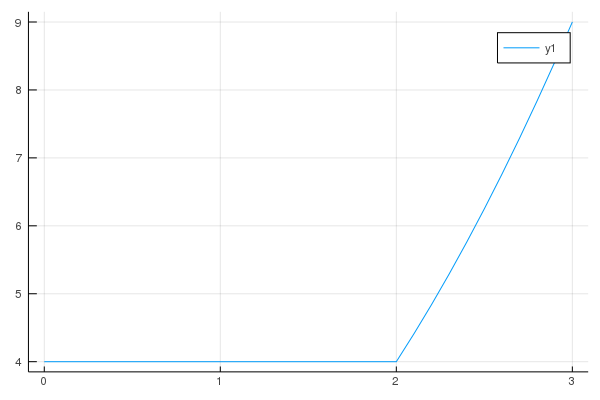

In [100]:
function snapabove(g, a)
    function f(x)
        if x > a         # "a" é capturado no encerramento f
            return g(x)
        else
            return g(a)
        end
    end
    return f    #encerramento com o a incorporado
end

f(x) = x^2
h = snapabove(f, 2.0)

using Plots

gr(fmt=:png);
plot(h, 0.0:0.1:3.0)

### Loops

O `for` e `while` loops também introduzem um escopo local, e você pode raciocinar aproximadamente sobre eles da mesma maneira que faria com uma função/encerramento.

Em particular.

In [101]:
for i in 1:2  # introduz local i 
    dval1 = i
    println(i)
end

# @show (i, dval1) # falharia porque não existe neste escopo

for i in 1:2  # introduz um local diferente i 
    println(i)
end

1
2
1
2


Por outro lado, assim como nos encerramentos, se uma variável já estiver definida, ela estará disponível no escopo interno.

In [102]:
dval2 = 0  # introduz variáveis 
for i in 1:2   # introduz ao local i
    dval2 = i  # refere-se a variavel externa
end

dval2 # ainda não pode se referir a 'i'

2

Similarmente, para while loops.

In [103]:
val = 1.0
tol = 0.002
while val > tol
    old = val
    val = val / 2
    difference = val - old
end

@show val;
# @show diferença falha, fora do escopo

val = 0.001953125


### Uma verificação rápida do design do escopo

Embora tenhamos argumentado contra variáveis globais como uma prática inadequada, você deve ter notado que, nas notas de aula no Jupyter, nós os usamos durante todo o processo.

Aqui, variáveis globais são usadas em um editor interativo porque são convenientes, e não porque são essenciais para o design de funções.

Um teste simples da diferença é pegar um segmento de código e envolvê-lo em uma função, por exemplo:

In [104]:
x = 2.0
f(y) = x + y
z = f(4.0)

for i in 1:3
    z += i
end

println("z = $z")

z = 12.0


Aqui, as variáveis globais são `x` e `z`, a função `f` refere-se à variável global `x`e a variável global `z` é modificada no `for` loop.

No entanto, você pode simplesmente agrupar o código inteiro em uma função.

In [105]:
function wrapped()
    x = 2.0
    f(y) = x + y
    z = f(4.0)

    for i in 1:3
        z += i
    end

    println("z = $z")
end

wrapped()

z = 12.0


Agora, não há variáveis globais.

Embora seja conveniente ignorar a quebra automática de nosso código, em geral você desejará quebrar qualquer código sensível ao desempenho dessa maneira.

## Exercícios


<a id='pyess-ex1'></a>

### Exercício 1

**Parte 1**: Dadas duas matrizes numéricas ou tuples `x_vals` e `y_vals` de igual comprimento, calcule seu produto interno usando `zip()`

**Parte 2**: Usando uma compreensão, conte o número de números pares entre 0 e 99

- Dica: `iseven` retorna `true` para números pares e `false` para probabilidades.


**Parte 3**: Usando uma compreensão, pegue `pairs = ((2, 5), (4, 2), (9, 8), (12, 10))` e conte o número de pares de `(a, b)` modo que ambos `a` e `b` sejam pares.



<a id='pyess-ex2'></a>

### Exercise 2

Considere o polinômio 


<a id='equation-polynom0'></a>
$$
p(x)
= a_0 + a_1 x + a_2 x^2 + \cdots a_n x^n
= \sum_{i=0}^n a_i x^i \tag{1}
$$

Usando `enumerate()` em seu loop, escreva uma função `p` que `p(x, coeff)` calcule o valor em (1) dado um ponto `x` e uma matriz de coeficientes `coeff`


<a id='pyess-ex3'></a>

### Exercício 3

Escreva uma função que use uma string como argumento e retorne o número de letras maiúsculas na string.

Dica: `uppercase("foo")` retorna `"FOO"`

<a id='pyess-ex4'></a>

### Exercício 4

Escreva uma função que use duas sequências `seq_a` e `seq_b` como argumentos e retorne `true` se todo elemento em `seq_a` também for um elemento da `seq_b`, caso contrário `false`.

- Por "sequência" queremos dizer uma matriz, tuple ou string.





<a id='pyess-ex5'></a>

### Exercício 5

As bibliotecas Julia incluem funções para interpolação e aproximação.

No entanto, vamos escrever nossa própria rotina de aproximação de funções como um exercício.

Em particular, escreva uma função `linapprox` que aceite como argumentos:


- Uma função `f` mapeando algum intervalo $ [a, b] $ em $ \mathbb R $  
- Dois escalares `a` e `b` fornecendo os limites deste intervalo.  
- Um número interio `n` determinando o número de pontos no *grid*.  
- Um número `x` satisfatório `a ≤ x ≤ b`  


e retorne a [interpolação linear por partes](https://en.wikipedia.org/wiki/Linear_interpolation) de `f` em `x`, com base em `n` pontos de *grid* igualmente espaçados `a = point[1] < point[2] < ... < point[n] = b`

Procure clareza, não eficiência.

Dica: use a função `range` para espaçar linearmente números.

### Exercício 6

Os seguintes dados listam cidades dos EUA e suas populações.

Copie este texto em um arquivo de texto chamado `us_cities.txt`e salve-o em seu diretório de trabalho atual.

- Ou seja, salve-o no local que Julia retornar quando você executar `pwd()`  


Isso também pode ser alcançado executando o seguinte código Julia:

In [106]:
open("us_cities.txt", "w") do f
  write(f,
"new york: 8244910
los angeles: 3819702
chicago: 2707120
houston: 2145146
philadelphia: 1536471
phoenix: 1469471
san antonio: 1359758
san diego: 1326179
dallas: 1223229")
end

167

Escreva um programa para calcular a população total nessas cidades.

Dicas:

- Se `f`é um tipo de arquivo, `eachline(f)` fornece um iterável que o orienta pelas linhas no arquivo
- `parse(Int, "100")` converte o string `"100"` em um número inteiro.


<a id='pyess-ex7'></a>

### Exercício 7

Refazer o Exercício 5, exceto:

1. Passe em um intervalo em vez de `a, b,` e `n`. Teste com um intervalo como `nodes = -1.0:0.5:1.0`.  
1. Em vez do `while` usado na solução do Exercício 5, encontre uma maneira melhor de agrupar eficientemente o` x` nos nós.


Dicas:
* Em vez da assinatura como `function linapprox(f, a, b, n, x)`, deve ser chamado como `function linapprox(f, nodes, x)`.
* `step(nodes), length(nodes), nodes[1]`, e `nodes[end]` pode ser útil.
* Digite `?÷` no jupyter para explorar quocientes da divisão euclidiana para obter bracketing mais eficiente.

## Soluções

### Exercício 1

Solução da parte 1:

Aqui está uma possível solução.

In [107]:
x_vals = [1, 2, 3]
y_vals = [1, 1, 1]
sum(x * y for (x, y) in zip(x_vals, y_vals))

6

Solução da parte 2

Uma solução é:

In [108]:
sum(iseven, 0:99)

50

Solução da parte 3:

Aqui está uma possível solução.

In [109]:
pairs = ((2, 5), (4, 2), (9, 8), (12, 10))
sum(xy -> all(iseven, xy), pairs)

2

### Exercício 2

In [110]:
p(x, coeff) = sum(a * x^(i-1) for (i, a) in enumerate(coeff))

p (generic function with 1 method)

In [111]:
p(1, (2, 4))

6

### Exercício 3

Aqui está uma solução:

In [112]:
function f_ex3(string)
    count = 0
    for letter in string
        if (letter == uppercase(letter)) && isletter(letter)
            count += 1
        end
    end
    return count
end

f_ex3("The Rain in Spain")

3

### Exercise 4

Aqui está uma solução:

In [113]:
function f_ex4(seq_a, seq_b)
    is_subset = true
    for a in seq_a
        if a ∉ seq_b
            is_subset = false
        end
    end
    return is_subset
end

# test
println(f_ex4([1, 2], [1, 2, 3]))
println(f_ex4([1, 2, 3], [1, 2]))

true
false


Se usarmos o tipo de dados `set`, a solução será mais fácil.

In [114]:
f_ex4_2(seq_a, seq_b) = Set(seq_a) ⊆ Set(seq_b) # \subseteq (⊆) é unicode para `issubset`

println(f_ex4_2([1, 2], [1, 2, 3]))
println(f_ex4_2([1, 2, 3], [1, 2]))

true
false


### Exercício 5

In [115]:
function linapprox(f, a, b, n, x)
    # avalia o interpolante linear por partes de f em x, 
    # no intervalo [a, b], com n pontos de grade espaçados uniformemente.

    length_of_interval = b - a
    num_subintervals = n - 1
    step = length_of_interval / num_subintervals

    # encontrar o primeiro ponto da grade maior que x 
    point = a
    while point ≤ x
        point += step
    end

    # x deve estar entre os pontos de grid (ponto - etapa) e o ponto
    u, v = point - step, point

    return f(u) + (x - u) * (f(v) - f(u)) / (v - u)
end

linapprox (generic function with 1 method)

Vamos testar:

In [116]:
f_ex5(x) = x^2
g_ex5(x) = linapprox(f_ex5, -1, 1, 3, x)

g_ex5 (generic function with 1 method)

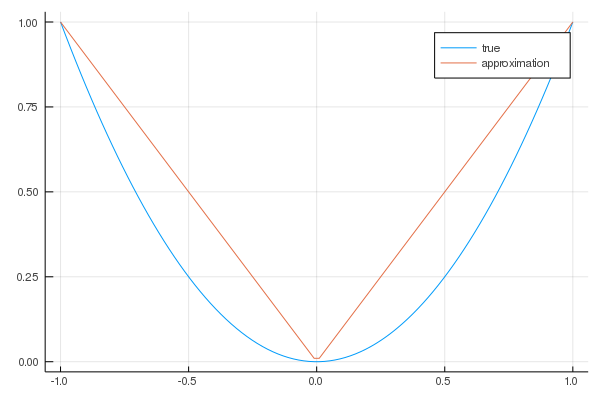

In [117]:
x_grid = range(-1.0, 1.0, length = 100)
y_vals = f_ex5.(x_grid)
y = g_ex5.(x_grid)
plot(x_grid, y_vals, label = "true")
plot!(x_grid, y, label = "approximation")

### Exercício 6

In [118]:
f_ex6 = open("us_cities.txt", "r")
total_pop = 0
for line in eachline(f_ex6)
    city, population = split(line, ':')  # tuple descompatando
    total_pop += parse(Int, population)
end
close(f_ex6)
println("Total population = $total_pop")

Total population = 23831986
